In [109]:
#Importamos las librerias necesarias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error


In [95]:
df_house = pd.read_csv('house_train_raw.csv')

In [96]:
df_house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [97]:
#Separamos las variables categoricas y las variables numericas
df_house_cat = df_house.select_dtypes(include=['object'])
df_house_num = df_house.select_dtypes(include=['int64','float64'])


In [98]:
df_house_cat.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [8]:
df_house_num.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500


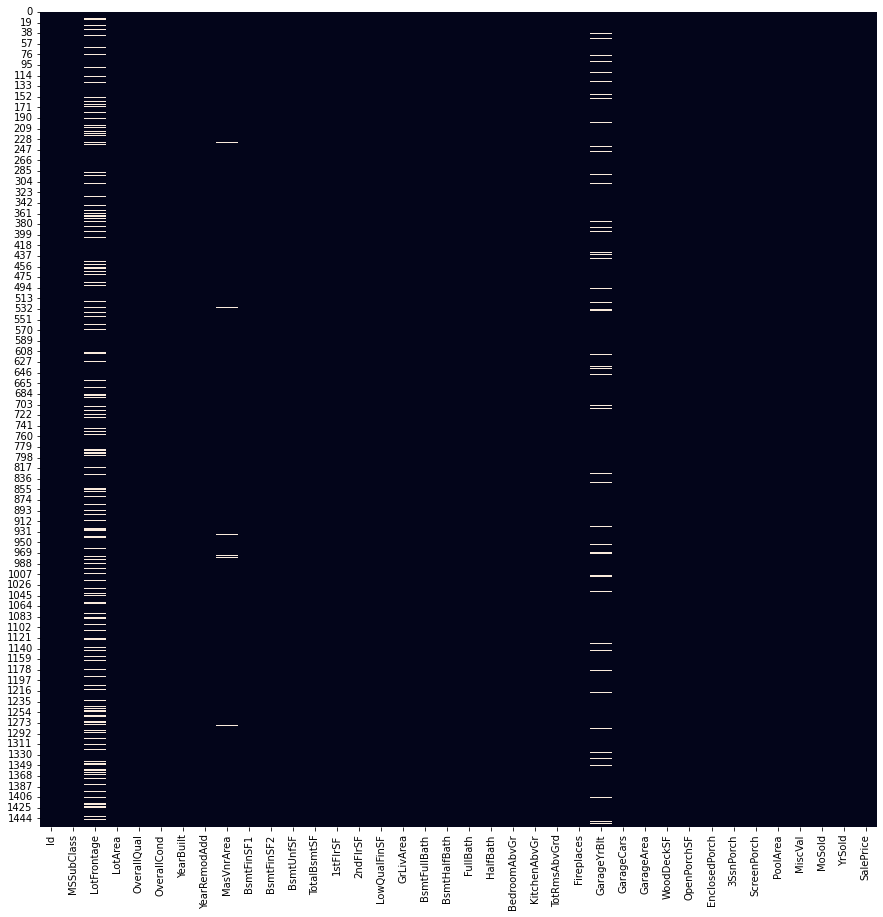

In [99]:
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_house_num.isnull(), cbar=False)
plt.show()

In [ ]:
#imputamos los valores medios de las variables numericas
df_house_num.fillna(df_house_num.mean(), inplace=True)
df_house_num.isnull().sum()

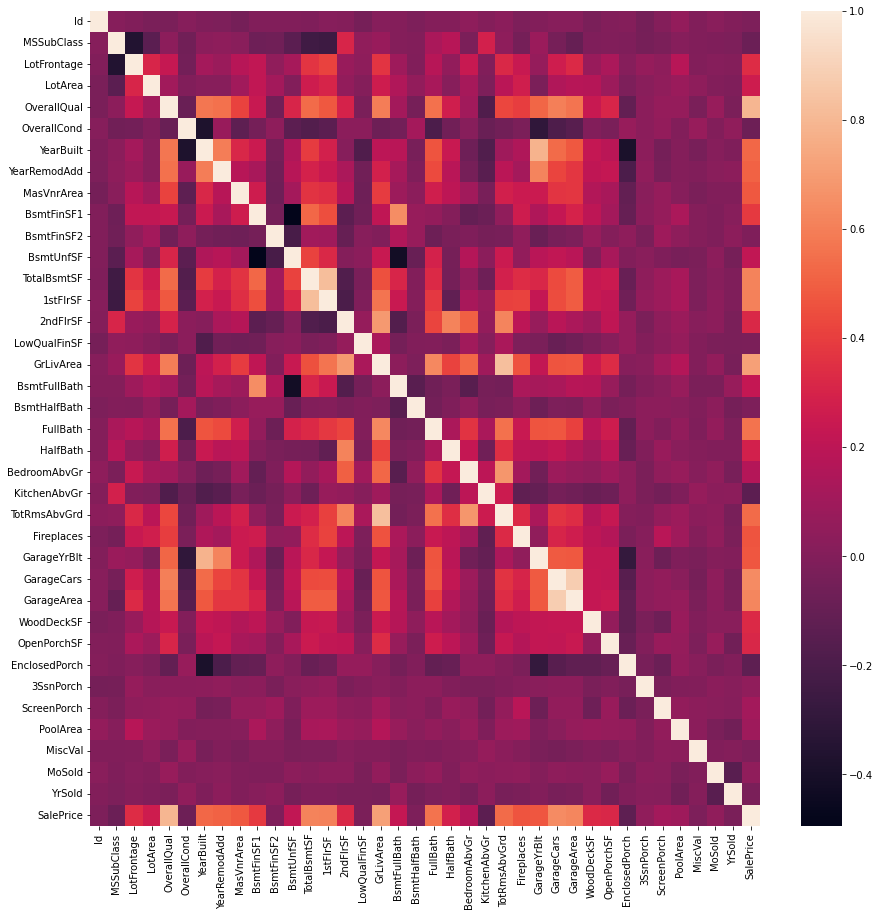

In [112]:
#graficamos el heatmap de la matriz de correlacion
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_house_num.corr())
plt.show()


In [113]:
#Creamos el dataframe de features que vamos a utilizar y el de target
df_features = df_house_num[['OverallQual','GarageArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageCars','Fireplaces','1stFlrSF','MasVnrArea','BsmtFinSF1','FullBath']]
df_target = df_house_num['SalePrice']

In [114]:
#definimos los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)

In [115]:
#Instanciamos el modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
#entrenamos el modelo
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [116]:
#verivicamos el rendimiento del modelo
print('Rendimiento del modelo: ', model.score(X_test, y_test))

Rendimiento del modelo:  0.8644569973832898


In [117]:
#Predecimos los valores de con el conjunto de testeo y lo guardamos en una variable 
y_pred = model.predict(X_test)

In [119]:
#Calculamos e imprimimos el RMSLE
print('Error cuadratico medio: ', mean_squared_log_error(y_test, y_pred))

Error cuadratico medio:  0.028263559490689615


In [89]:
#cargamos el dataframe de test
df_test =pd.read_csv('houses_test_raw.csv')

In [90]:
#Seleccionamos las columnas que vamos a utilizar para la prediccion
df_test_res = df_test[['OverallQual','GarageArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageCars','Fireplaces','1stFlrSF','MasVnrArea','BsmtFinSF1','FullBath']]

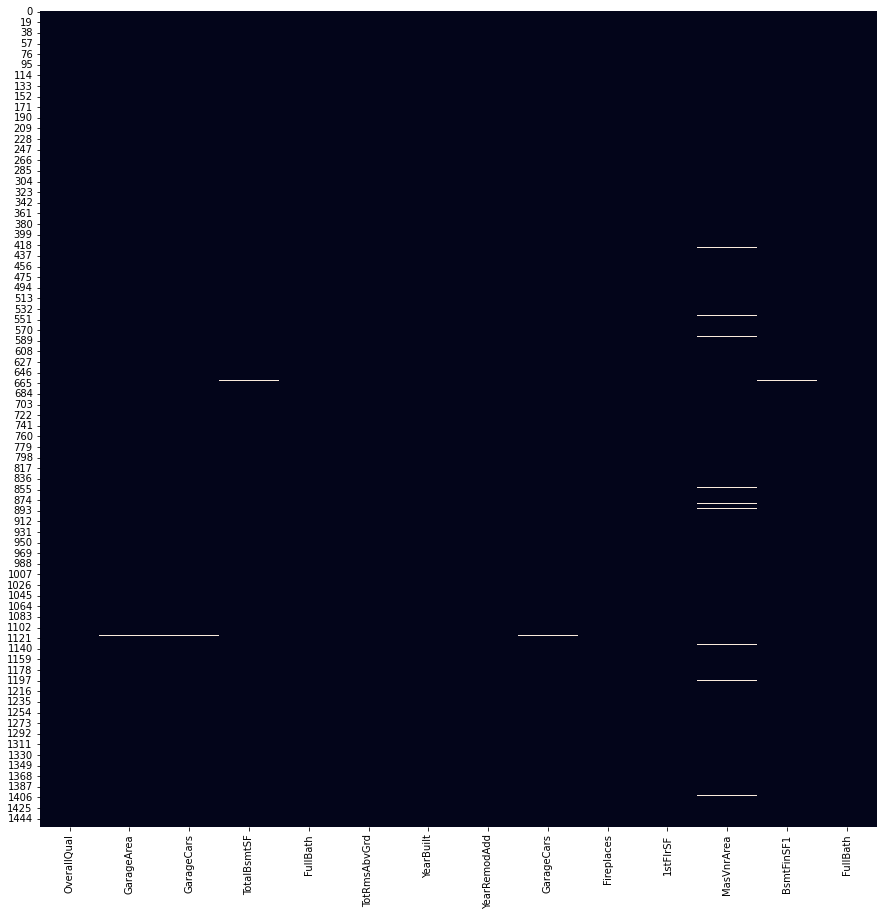

In [91]:
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_test_res.isnull(), cbar=False)
plt.show()

In [ ]:
#imputamos los valores medios de las variables numericas
df_test_res.fillna(df_test_res.mean(), inplace=True)
df_test_res.isnull().sum()

In [93]:
#obtenemos los valores predicho
df_resultado = model.predict(df_test_res)


In [94]:
df_resultado

array([120078.64, 148613.5 , 159252.56, ..., 170564.36, 118210.23,
       237379.56])